In [230]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np 
import pandas as pd 

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

### <b><span style='color:#16C2D5'>|</span> Input the data</b> 

In [231]:
df = pd.read_csv("Data/CUSTOM__BINARY_diabetes_012_health_indicators_BRFSS2015.csv")

df_multiclass = pd.read_csv("Data/CUSTOM_diabetes_012_health_indicators_BRFSS2015.csv")


In [232]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Arthritis,Depression,Race_white,Race_black,Race_AMI_AKN,Race_asian,Race_HI_PI,Race_other,Race_multi,Race_hispanic
0,0.00,1.00,1.00,1.00,40.00,1.00,0.00,0.00,0.00,0.00,...,1.00,1.00,1,0,0,0,0,0,0,0
1,0.00,0.00,0.00,0.00,25.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,1,0,0,0,0,0,0,0
2,0.00,1.00,1.00,1.00,28.00,0.00,0.00,0.00,0.00,1.00,...,1.00,1.00,1,0,0,0,0,0,0,0
3,0.00,1.00,0.00,1.00,27.00,0.00,0.00,0.00,1.00,1.00,...,1.00,0.00,1,0,0,0,0,0,0,0
4,0.00,1.00,1.00,1.00,24.00,0.00,0.00,0.00,1.00,1.00,...,0.00,0.00,0,0,0,0,0,0,1,0


In [233]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'PrimaryDoc', 'Checkup1', 'Arthritis', 'Depression', 'Race_white',
       'Race_black', 'Race_AMI_AKN', 'Race_asian', 'Race_HI_PI', 'Race_other',
       'Race_multi', 'Race_hispanic'],
      dtype='object')

In [234]:
df['Sex'].value_counts()

Sex
0.00    138506
1.00    108466
Name: count, dtype: int64

In [235]:

# To get a list of all column headers
column_headers = df.columns.tolist()

print(column_headers)


['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'PrimaryDoc', 'Checkup1', 'Arthritis', 'Depression', 'Race_white', 'Race_black', 'Race_AMI_AKN', 'Race_asian', 'Race_HI_PI', 'Race_other', 'Race_multi', 'Race_hispanic']


In [236]:
# Remove Unneccessary value [0.00195%]
df = df[df['Sex'] != 'Other']

### <b><span style='color:#16C2D5'>|</span> Visualazations</b> 

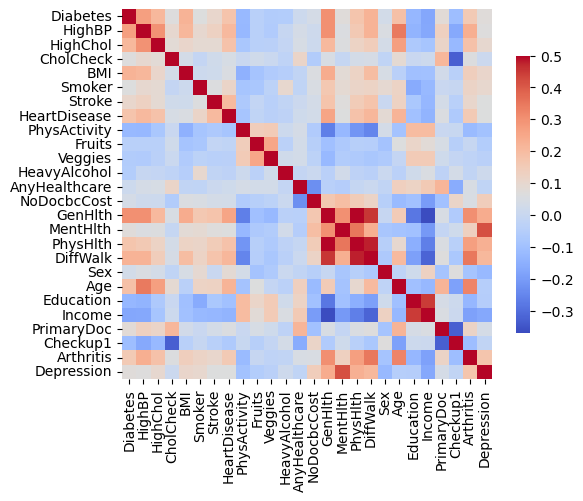

In [237]:
#make a correlation matrix of the diabetes_df
corr = df.drop(columns=[column for column in df.columns if column.startswith('Race')]).rename(columns={"HeartDiseaseorAttack":"HeartDisease","HvyAlcoholConsump":"HeavyAlcohol",'Diabetes_012':'Diabetes'}).corr()

#make it in seaborne
figure = sns.heatmap(corr, annot=False, cmap='coolwarm', square=True, cbar_kws={'shrink': .75}, yticklabels=True,vmax=0.5,)

<Axes: >

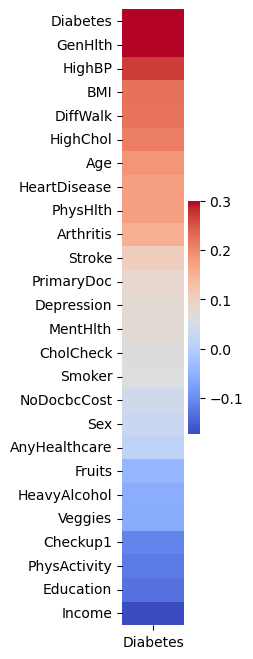

In [238]:
mini_corr = corr['Diabetes'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(1, 8))
sns.heatmap(mini_corr, annot=False,square=False, cmap='coolwarm', cbar_kws={'shrink': .75}, yticklabels=True,vmax=0.3,)

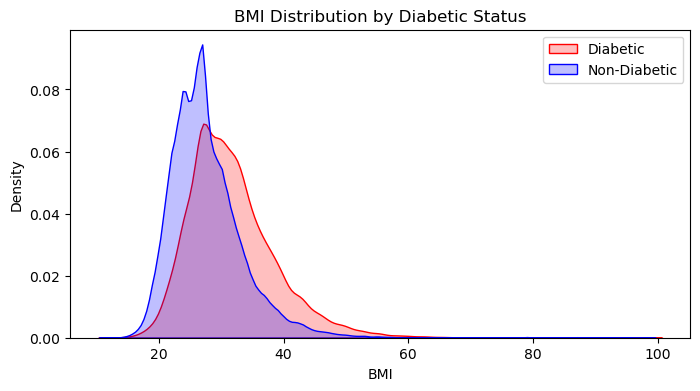

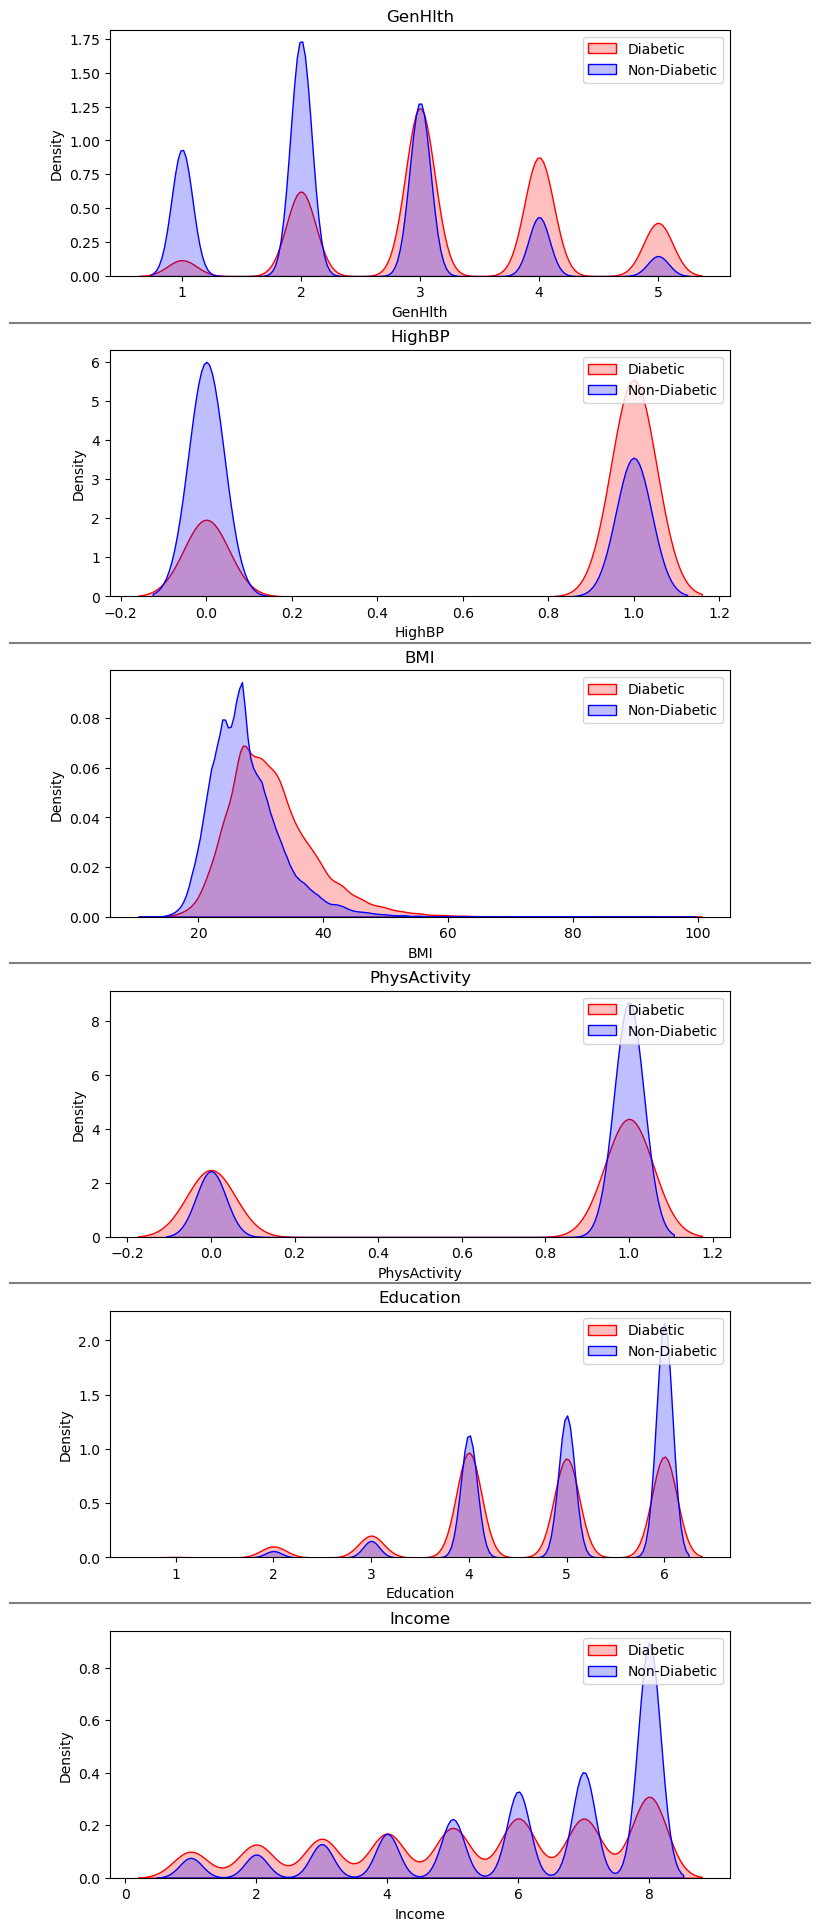

In [239]:
#import warnings and suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.lines as mlines

diabetic_df = df[df['Diabetes_012'] == 1]
non_diabetic_df = df[df['Diabetes_012'] == 0]

#plot each series together

plt.figure(figsize=(8, 4))
sns.kdeplot(diabetic_df, x='BMI', fill=True, color='r', label='Diabetic',)
sns.kdeplot(non_diabetic_df, x='BMI', fill=True, color='b', label='Non-Diabetic',)
plt.title('BMI Distribution by Diabetic Status')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()


fig, axes = plt.subplots(6, 1, figsize=(8, 24))
fig.subplots_adjust(wspace=0.1, hspace=0.3)
x=range(6)
plots = ['GenHlth', 'HighBP', 'BMI', 'PhysActivity', 'Education', 'Income']


for x in range(6):
    sns.kdeplot(diabetic_df, x=plots[x], fill=True, color='r', label='Diabetic', ax=axes[x])
    sns.kdeplot(non_diabetic_df, x=plots[x], fill=True, color='b', label='Non-Diabetic', ax=axes[x])
    axes[x].set_title(f'{plots[x]}')
    axes[x].set_xlabel(plots[x])
    # axes[x].set_ylabel('Density')
    axes[x].legend()

for i in range(1, 6):  # Starting from 1 to draw lines after the first subplot
    position = (i/6)*0.8 + .091
    line = mlines.Line2D([0, 1],[position, position], transform=fig.transFigure, color="grey")
    fig.add_artist(line)

Text(0.5, 0, 'Diabetic Status')

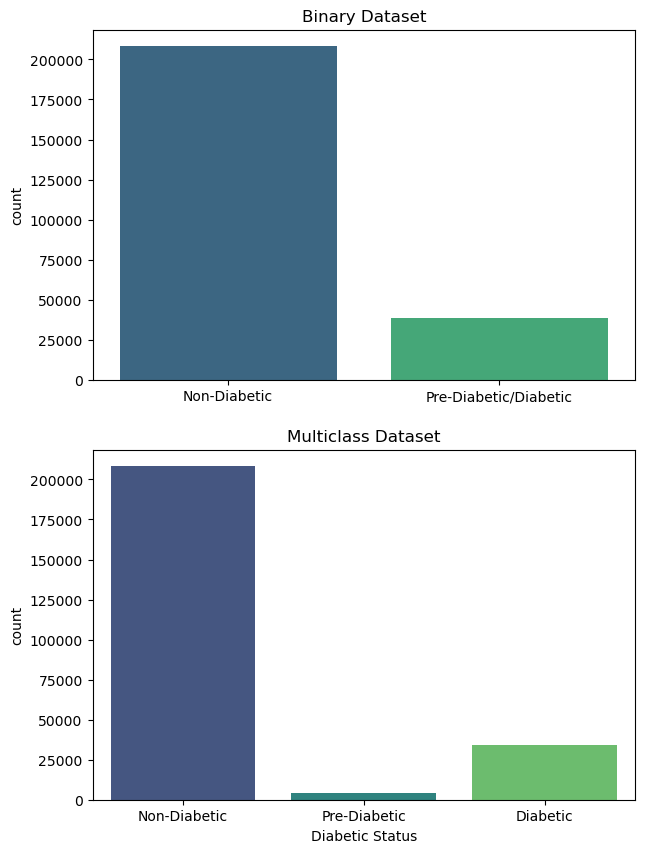

In [240]:
#plot the distribution of the target variable in both datasets
fig, ax = plt.subplots(2, 1, figsize=(7, 10))
sns.countplot(x='Diabetes_012', data=df, dodge=False, palette= 'viridis', ax=ax[0])
sns.countplot(x='Diabetes_012', data=df_multiclass, dodge=False, palette= 'viridis', ax=ax[1])
ax[0].set_title('Binary Dataset')
ax[1].set_title('Multiclass Dataset')
ax[0].set_xticklabels(['Non-Diabetic', 'Pre-Diabetic/Diabetic'])
ax[1].set_xticklabels(['Non-Diabetic', 'Pre-Diabetic', 'Diabetic'])
ax[0].set_xlabel('')
ax[1].set_xlabel('Diabetic Status')


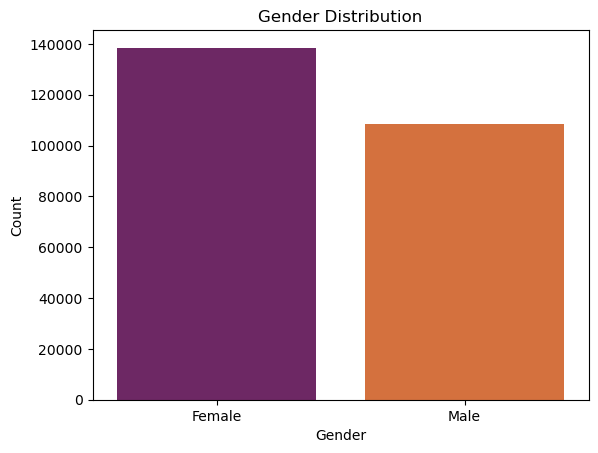

In [241]:
#Bar plot for gender
# import seaborn as sns
# import matplotlib.pyplot as plt

# Map numeric values to descriptive labels for the purpose of plotting
df['Gender'] = df['Sex'].map({0: 'Female', 1: 'Male'})

# Plot using 'Gender' for both x and hue; this will automatically generate a legend
sns.countplot(x='Gender', hue='Sex', data=df, dodge=False, palette= 'inferno')  # `dodge=False` to avoid separating the bars

# Customize the legend
plt.legend().remove()

plt.title('Gender Distribution')
plt.xlabel('Gender')  # Optionally adjust the label if needed
plt.ylabel('Count')   # Optionally adjust the label if needed
plt.show()


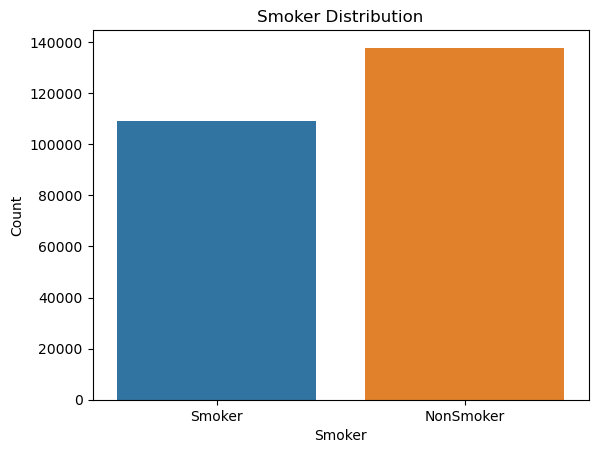

In [242]:
#Bar plot for Smoker

# 'Smoker' column where 0 represents nonsmoker and 1 smoker
# Map numeric values to descriptive labels for the purpose of plotting
df['Smoker'] = df['Smoker'].map({0: 'NonSmoker', 1: 'Smoker'})

# Plot using 'Smoker' for both x and hue; this will automatically generate a legend
sns.countplot(x='Smoker', hue='Smoker', data=df, dodge=False)  # 'dodge=False' to avoid separating the bars

# Customize the legend
plt.legend().remove()

plt.title('Smoker Distribution')
plt.xlabel('Smoker')  # Optionally adjust the label if needed
plt.ylabel('Count')   # Optionally adjust the label if needed
plt.show()

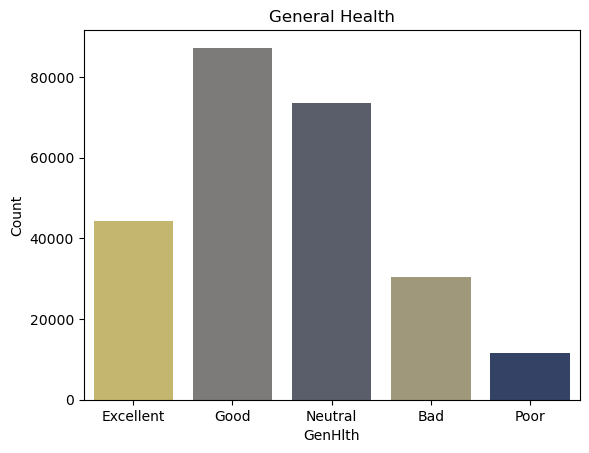

In [243]:
#Bar plot for GenHlth
df['GenHlth'] = df['GenHlth'].map({ 1: 'Excellent', 2: 'Good', 3: 'Neutral', 4: 'Bad', 5: 'Poor'})

category_order = ['Excellent', 'Good', 'Neutral', 'Bad', 'Poor']

# Plot using 'Gender' for both x and hue; this will automatically generate a legend
sns.countplot(x='GenHlth', hue='GenHlth', data=df, dodge=False, order=category_order, palette='cividis')  # `dodge=False` to avoid separating the bars

# Customize the legend
plt.legend().remove()


plt.title('General Health')
plt.xlabel('GenHlth')  # Optionally adjust the label if needed
plt.ylabel('Count')   # Optionally adjust the label if needed
plt.show()
